HEART DISEASE DETECTOR

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool, cv, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from catboost import CatBoostClassifier, Pool, cv
import plotly.express as px


In [40]:
df = pd.read_csv('dataset/archive.zip')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [42]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [43]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype("string")

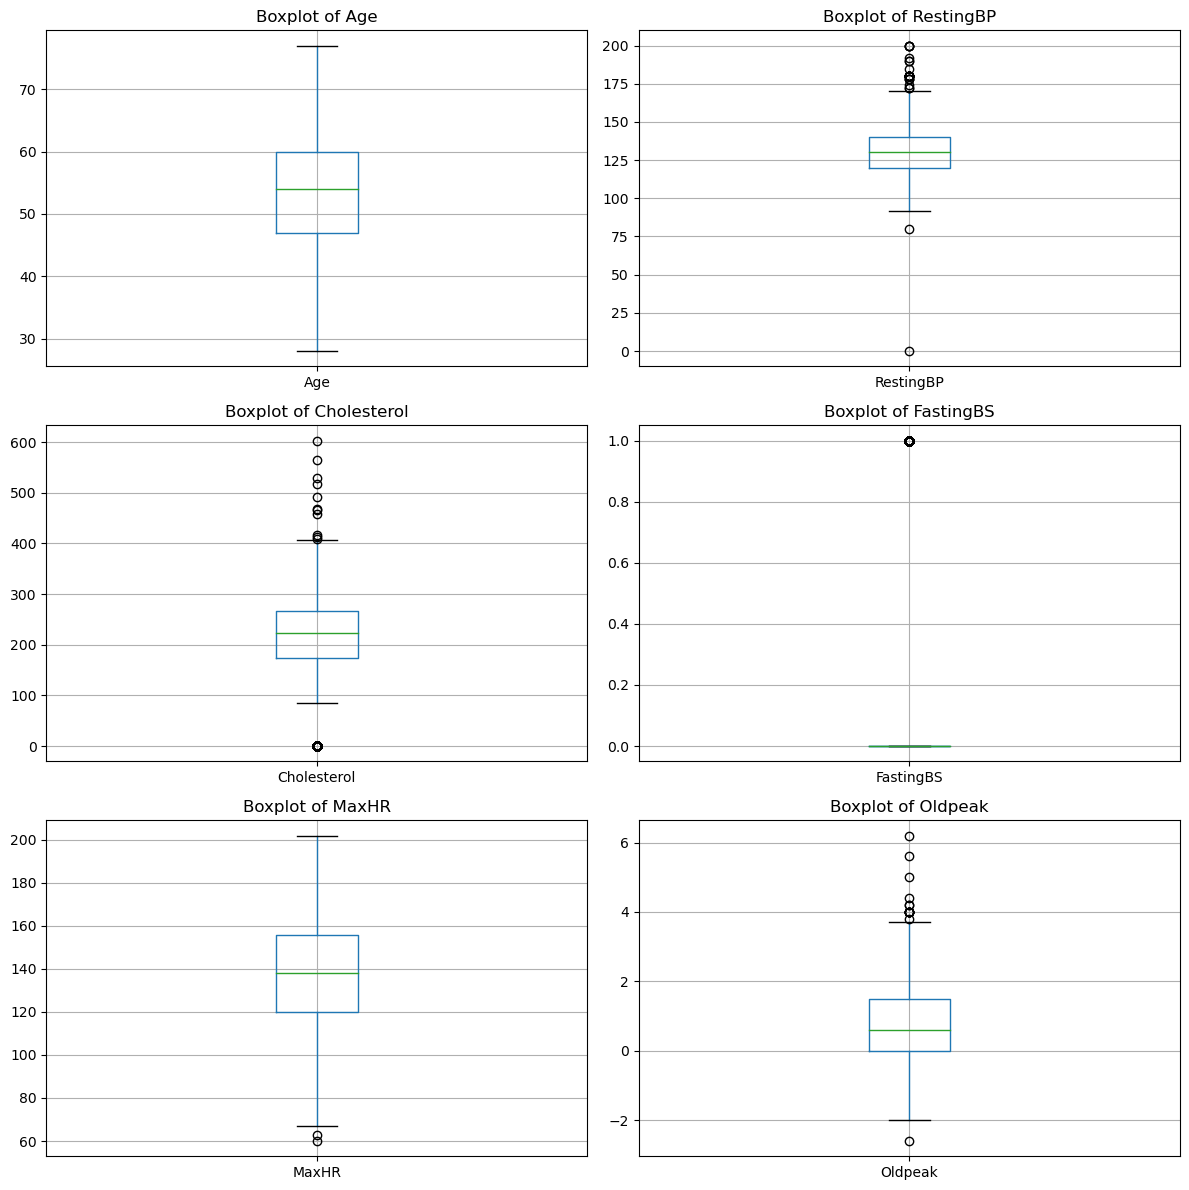

In [44]:
columns_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

num_columns = len(columns_to_plot)
num_rows = (num_columns + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()

# Show the plots
plt.show()


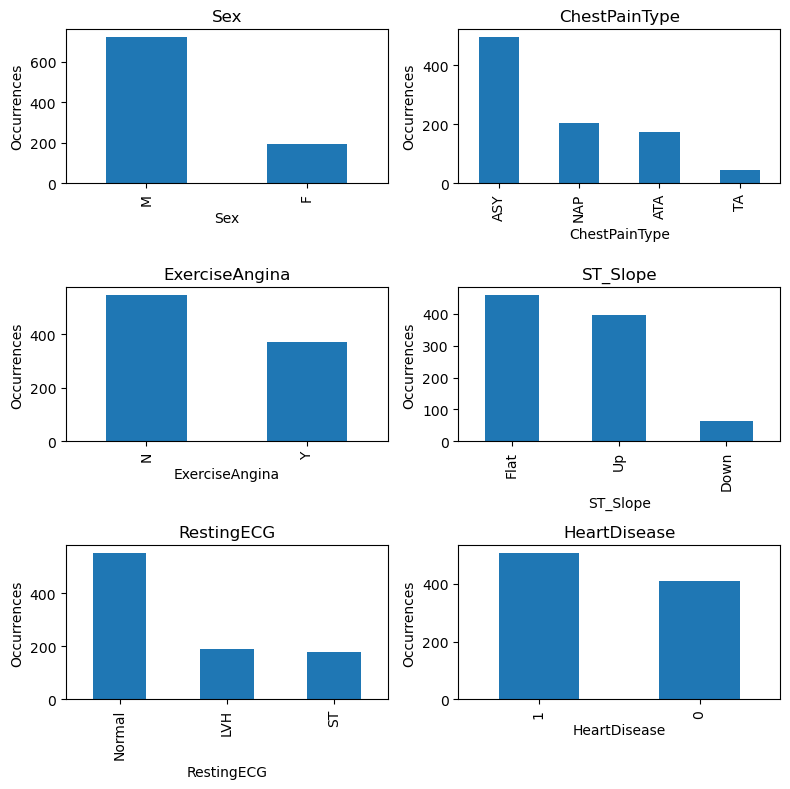

In [51]:
columns_to_plot = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope', 'RestingECG','HeartDisease']

# Determine the number of rows and columns based on the number of selected columns
num_columns = len(columns_to_plot)
num_rows = (num_columns + 1) // 2  # Show plots in two columns

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(8, 8))

# Flatten the 2D axes array to simplify indexing
axes = axes.flatten()

# Iterate through the selected columns and plot bar charts for the occurrences
for i, column in enumerate(columns_to_plot):
    counts = df[column].value_counts()
    counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Occurrences')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the bar charts
plt.show()

In [109]:
import scipy.stats as stats

def normality_test(df, colunas):
    results = []
    for col in colunas:  # Exclua a coluna 'class'
        stat, p_value = stats.shapiro(df[col])
        is_normal = p_value > 0.05  # Verifica se os dados são considerados normais (p-valor > 0.05)
        results.append([col, p_value, is_normal])
    
    return pd.DataFrame(results, columns=["Coluna", "p_valor", "Normal?"])

In [112]:
def differences_test(grupo1, grupo2, colunas):
    results = []
    for col in colunas:  # Exclua a coluna 'class'
        stat, p_value = stats.ttest_ind(grupo1[col], grupo2[col])
        is_different = p_value > 0.05  # Verifica se os dados são considerados normais (p-valor > 0.05)
        results.append([col, p_value, is_different])
    
    return pd.DataFrame(results, columns=["Coluna", "p_valor", "Different?"])

In [110]:
normality_test(df, ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'])

,Coluna,p_valor,Normal?
0,Age,2.170367e-05,False
1,RestingBP,1.494997e-15,False
2,Cholesterol,6.972956e-27,False
3,FastingBS,3.783506e-44,False
4,MaxHR,1.683220e-04,False
5,Oldpeak,8.269499e-28,False


In [113]:
df_class_0 = df[df['HeartDisease'] == 0]
df_class_1 = df[df['HeartDisease'] == 1]

differences_test(df_class_0, df_class_1, ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'])

,Coluna,p_valor,Different?
0,Age,3.007953e-18,False
1,RestingBP,1.095315e-03,False
2,Cholesterol,9.308309e-13,False
3,FastingBS,1.753598e-16,False
4,MaxHR,1.137786e-36,False
5,Oldpeak,2.390772e-37,False


In [114]:
from scipy.stats import chi2_contingency
# Crie uma tabela de contingência vazia



contingency_table = pd.DataFrame()

# Itere sobre as colunas com variáveis categóricas
for column in df.columns:
    if df[column].dtype == 'string':
        contingency_table = pd.crosstab(df[column], df.index, rownames=[column])

# Realize o teste de independência Qui-Quadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Imprima as estatísticas do teste e o valor p
print(f"Estatística Qui-Quadrado: {chi2}")
print(f"Valor p: {p}")

# Avalie se a associação é estatisticamente significativa com base no valor p
alpha = 0.05  # Nível de significância
if p < alpha:
    print("Há uma associação estatisticamente significativa entre as variáveis.")
else:
    print("Não há uma associação estatisticamente significativa entre as variáveis.")

Estatística Qui-Quadrado: 1836.0000000000002
Valor p: 0.4824450923275001
Não há uma associação estatisticamente significativa entre as variáveis.


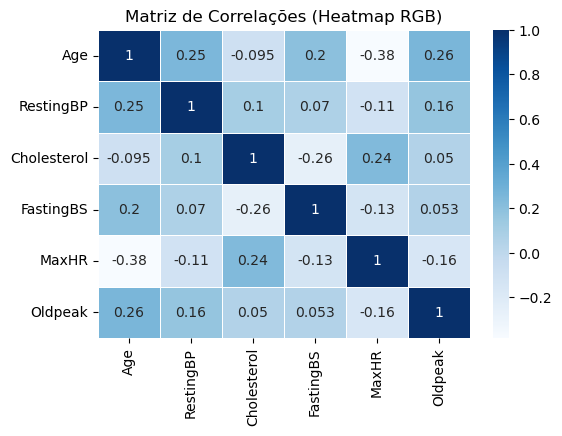

In [119]:
import seaborn as sns

df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']].corr()
, cmap='Blues', annot=True, linewidths=0.5)

# Adicione um título ao heatmap
plt.title('Matriz de Correlações (Heatmap RGB)')

# Exiba o heatmap
plt.show()

In [99]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Especifique as colunas categóricas
categorical_features = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

# Crie o modelo CatBoostClassifier e especifique as variáveis categóricas
model = CatBoostClassifier(iterations=200, 
                           depth=3, 
                           learning_rate=0.01, 
                           #loss_function='Logloss', 
                           cat_features=categorical_features, 
                           early_stopping_rounds=10,
                           random_seed=42,
                           custom_loss=['AUC', 'Accuracy']
                           )

#catboost_pool = Pool(X_test, y_test)
# Treine o modelo
model.fit(
    X_train, 
    y_train,
    eval_set=(X_test, y_test),
    verbose=True,
    plot=True
    )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6867164	test: 0.6875068	best: 0.6875068 (0)	total: 21.2ms	remaining: 4.22s
1:	learn: 0.6822097	test: 0.6834818	best: 0.6834818 (1)	total: 45.9ms	remaining: 4.54s
2:	learn: 0.6760865	test: 0.6783149	best: 0.6783149 (2)	total: 89.2ms	remaining: 5.86s
3:	learn: 0.6704484	test: 0.6734222	best: 0.6734222 (3)	total: 115ms	remaining: 5.62s
4:	learn: 0.6631072	test: 0.6669262	best: 0.6669262 (4)	total: 146ms	remaining: 5.7s
5:	learn: 0.6568614	test: 0.6607789	best: 0.6607789 (5)	total: 180ms	remaining: 5.83s
6:	learn: 0.6504723	test: 0.6551594	best: 0.6551594 (6)	total: 201ms	remaining: 5.55s
7:	learn: 0.6453489	test: 0.6505583	best: 0.6505583 (7)	total: 223ms	remaining: 5.34s
8:	learn: 0.6396695	test: 0.6449658	best: 0.6449658 (8)	total: 241ms	remaining: 5.11s
9:	learn: 0.6336749	test: 0.6400305	best: 0.6400305 (9)	total: 258ms	remaining: 4.9s
10:	learn: 0.6284798	test: 0.6352218	best: 0.6352218 (10)	total: 274ms	remaining: 4.71s
11:	learn: 0.6233514	test: 0.6308515	best: 0.630851

In [100]:
y_pred = model.predict(X_test)

In [101]:
feature_importances = model.get_feature_importance(prettified=True)
feature_importances

,Feature Id,Importances
0,ST_Slope,41.714824
1,ChestPainType,16.771889
2,ExerciseAngina,9.779473
3,Cholesterol,8.512968
4,Oldpeak,8.311980
5,Sex,6.695697
6,Age,3.776867
7,FastingBS,2.300005
8,MaxHR,1.646951
9,RestingBP,0.342215


<AxesSubplot:ylabel='Feature Id'>

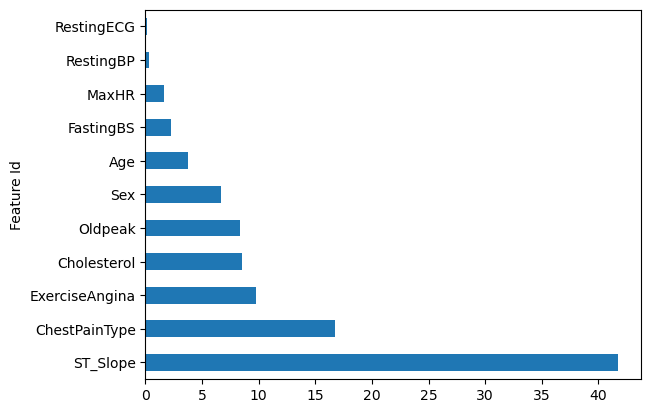

In [102]:
feature_importances.plot(kind='barh', x='Feature Id', y='Importances', legend=False)

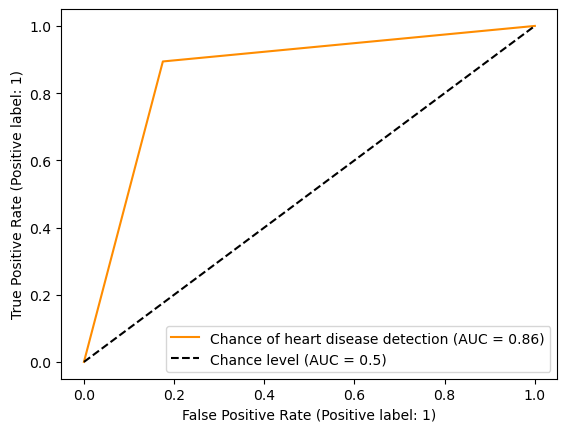

In [103]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_pred,
    y_test,
    name=f"Chance of heart disease detection",
    color="darkorange",
    plot_chance_level=True)
   

In [104]:
print(model.get_best_score())

{'learn': {'Accuracy': 0.8787465940054496, 'Logloss': 0.3368250697477927}, 'validation': {'Accuracy': 0.8641304347826086, 'Logloss': 0.3632791385863822, 'AUC': 0.9275397499696565}}


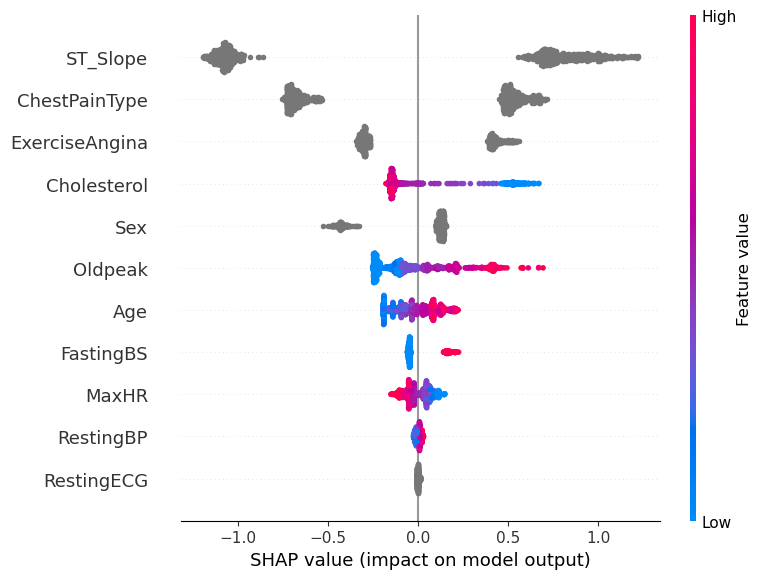

In [108]:
import shap

explainer = shap.TreeExplainer(model)

# Obtenha valores SHAP para explicar as previsões
shap_values = explainer.shap_values(X)

# Gere um gráfico de barras de resumo de importância das características
shap.summary_plot(shap_values, X)